In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('C:/Users/Desktop/자료/2022년 2학기/데이터마이닝/과제2/kyungsang_univ_2.csv', encoding='cp949')
data.head() 

,Unnamed: 0,측정일시,monthx,monthy,dayx,dayy,hourx,houry,기온(°C),강수량(mm),...,일조(hr),지면온도(°C),SO2,CO,O3,NO2,PM10,PM25,발전량,발전률
0,0,2017010101,0.5,0.866025,0.201299,0.97953,0.258819,0.965926,-2.4,0.0,...,0.0,-1.3,0.002,0.8,0.010,0.024,60,26,0.0,0.0
1,1,2017010102,0.5,0.866025,0.201299,0.97953,0.500000,0.866025,-3.0,0.0,...,0.0,-1.5,0.003,0.8,0.008,0.027,51,32,0.0,0.0
2,2,2017010103,0.5,0.866025,0.201299,0.97953,0.707107,0.707107,-3.1,0.0,...,0.0,-1.7,0.002,0.7,0.011,0.021,53,29,0.0,0.0
3,3,2017010104,0.5,0.866025,0.201299,0.97953,0.866025,0.500000,-3.5,0.0,...,0.0,-1.8,0.002,0.7,0.008,0.020,46,22,0.0,0.0
4,4,2017010105,0.5,0.866025,0.201299,0.97953,0.965926,0.258819,-3.6,0.0,...,0.0,-1.9,0.006,0.8,0.007,0.023,45,33,0.0,0.0


In [3]:
# data.info()
# 17520:26280
# 26280:
X_train = data.iloc[17520:26280, 2:22]
X_train = X_train.reset_index(drop=True)
X_train.head()

,monthx,monthy,dayx,dayy,hourx,houry,기온(°C),강수량(mm),풍속(m__s),습도(%),증기압(hPa),현지기압(hPa),일조(hr),지면온도(°C),SO2,CO,O3,NO2,PM10,PM25
0,0.5,0.866025,0.201299,0.97953,0.258819,0.965926,-5.7,0.0,0.3,49,2.0,1029.8,0.0,-6.3,0.005,0.6,0.017,0.025,35,15
1,0.5,0.866025,0.201299,0.97953,0.500000,0.866025,-5.9,0.0,0.6,49,1.9,1029.4,0.0,-7.0,0.006,0.6,0.018,0.024,27,12
2,0.5,0.866025,0.201299,0.97953,0.707107,0.707107,-6.5,0.0,0.5,50,1.9,1029.6,0.0,-7.4,0.006,0.6,0.020,0.022,32,13
3,0.5,0.866025,0.201299,0.97953,0.866025,0.500000,-7.2,0.0,0.1,57,2.0,1029.7,0.0,-7.7,0.004,0.5,0.030,0.014,27,12
4,0.5,0.866025,0.201299,0.97953,0.965926,0.258819,-7.4,0.0,0.2,58,2.0,1029.0,0.0,-7.8,0.004,0.5,0.031,0.012,27,12


In [4]:
y_train = data.iloc[17520:26280, 22]
y_train = y_train.reset_index(drop=True)
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 발전량, dtype: float64

In [5]:
X_test = data.iloc[26280:, 2:22]
X_test = X_test.reset_index(drop=True)
X_test.head()

,monthx,monthy,dayx,dayy,hourx,houry,기온(°C),강수량(mm),풍속(m__s),습도(%),증기압(hPa),현지기압(hPa),일조(hr),지면온도(°C),SO2,CO,O3,NO2,PM10,PM25
0,0.5,0.866025,0.201299,0.97953,0.258819,0.965926,-6.3,0.0,0.1,55,2.1,1028.5,0.0,-3.3,0.001,0.4,0.027,0.003,11,1
1,0.5,0.866025,0.201299,0.97953,0.500000,0.866025,-7.2,0.0,0.3,57,2.0,1028.4,0.0,-3.6,0.001,0.5,0.025,0.003,11,3
2,0.5,0.866025,0.201299,0.97953,0.707107,0.707107,-6.6,0.0,0.8,51,1.9,1028.5,0.0,-4.0,0.001,0.4,0.029,0.001,11,2
3,0.5,0.866025,0.201299,0.97953,0.866025,0.500000,-6.0,0.0,0.3,41,1.6,1028.6,0.0,-4.0,0.001,0.4,0.025,0.002,13,2
4,0.5,0.866025,0.201299,0.97953,0.965926,0.258819,-7.0,0.0,0.0,47,1.7,1028.5,0.0,-4.2,0.001,0.5,0.022,0.003,13,2


In [6]:
y_test = data.iloc[26280:, 22]
y_test = y_test.reset_index(drop=True)
y_test.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 발전량, dtype: float64

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8760, 20)
(8760,)
(8784, 20)
(8784,)


In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [9]:
print('Slope:', lin_reg.coef_)

Slope: [ 1.22247011e+01  3.01226772e+01 -1.47897219e-01  2.88457222e+00
  8.25763059e+00 -7.74133419e+01 -9.00685012e+00 -1.13024854e+00
  1.70762093e+00 -9.55138990e-01 -2.36512528e+00  1.08043105e+00
  1.56543479e+02  1.31380797e+01  3.18227171e+03 -2.22846737e+01
 -7.24566506e+02 -2.11001326e+03 -5.73322353e-01  2.64956308e+00]


In [10]:
print('Intercept:', lin_reg.intercept_)

Intercept: -958.4213196307458


In [17]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('MSE')
print('MSE Train', mean_squared_error(y_train, y_train_pred))
print('MSE Test', mean_squared_error(y_test, y_test_pred))
print('-' * 30)
print('RMSE')
print('RMSE Train', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('-' * 30)
print('MAE')
print('MAE Train', mean_absolute_error(y_train, y_train_pred))
print('MAE Test', mean_absolute_error(y_test, y_test_pred))
print('-' * 30)
print('R^2')
print('R2 Score Train', r2_score(y_train, y_train_pred))
print('R2 Score Test', r2_score(y_test, y_test_pred))
print('-' * 30)
print('PCC')
print('PCC Train')
print(np.corrcoef(y_train, y_train_pred))
print('PCC Test')
print(np.corrcoef(y_test, y_test_pred))

MSE
MSE Train 7383.11218570638
MSE Test 7169.622921420369
------------------------------
RMSE
RMSE Train 85.9250381769271
RMSE Test 84.67362589035838
------------------------------
MAE
MAE Train 61.372788591403605
MAE Test 61.6900876895785
------------------------------
R^2
R2 Score Train 0.8179178521840941
R2 Score Test 0.8215949449071962
------------------------------
PCC
PCC Train
[[1.         0.90438811]
 [0.90438811 1.        ]]
PCC Test
[[1.         0.90816667]
 [0.90816667 1.        ]]


### 데이터 예측값 그래프화
- 0보다 낮은 값을 예측한게 있어서 이것을 보완하는 것은 제가 보완점 슬라이드에 넣겠습니다.
- 태양광 발전량이 0보다 낮게 예측되는 것은 말이 안되니까...

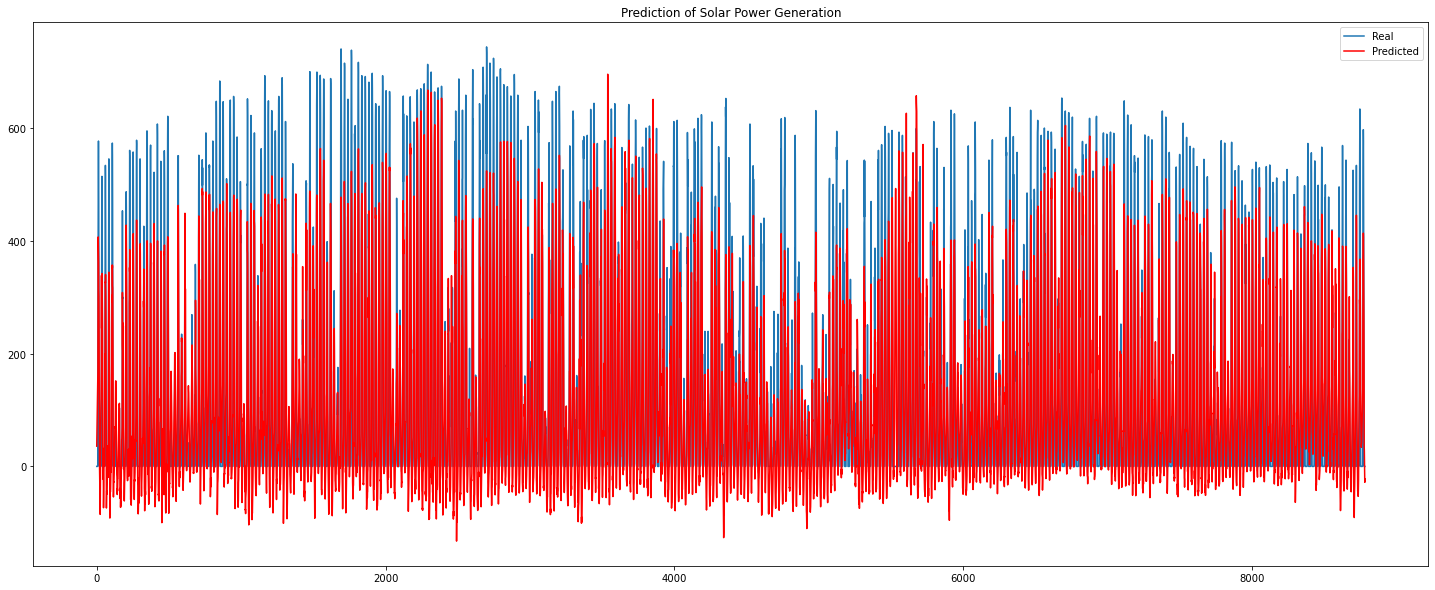

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.title('Prediction of Solar Power Generation')
plt.plot(y_test, label='Real')
plt.plot(y_test_pred, color='red', label='Predicted')
plt.legend()
plt.show()

### 시계열 데이터 특성 고려 안한 Cross Validation

In [62]:
# Cross Validation
# https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# 시계열 고려 안한 CV
# R2
scores = cross_val_score(lin_reg, X_train, y_train, scoring='r2', cv=5)
print(scores)

# MSE
scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
# print(scores)
print(abs(scores))

# MAE
scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
# print(scores)
print(abs(scores))


[0.80956489 0.85738604 0.60438122 0.82014027 0.79529411]
[ 8325.55332867  7349.69774682 14110.1139877   6194.32002176
  7341.6106805 ]
[70.16538787 63.97230626 71.69660373 58.37095857 67.59739046]


### Summary Statistics

In [63]:
print('MSE', np.mean([8325.55332867, 7349.69774682, 14110.1139877, 6194.32002176, 7341.6106805]))
print('RMSE', np.sqrt(8664.2591))
print('MAE', np.mean([70.165, 63.972, 71.696, 58.370, 67.597]))

MSE 8664.25915309
RMSE 93.08200201972451
MAE 66.35999999999999


### 시계열 데이터에 적합한 Cross-Validation
- 시계열 데이터 인위적으로 부위 나누기
- Train Data인 2019년 데이터를 4등분하였습니다.
- 8760 / 4 = 2190이므로

### 시계열 데이터 Cross-Validation 2가지 방법
1. Blocking Time Series Split
2. Nested Cross Validation

In [34]:
# 1. Blocking Time Series Split

cv_1_x = X_train.iloc[:2190]
cv_1_y = y_train.iloc[:2190]

cv_2_x = X_train.iloc[2190:4380]
cv_2_y = y_train.iloc[2190:4380]

cv_3_x = X_train.iloc[4380:6570]
cv_3_y = y_train.iloc[4380:6570]

cv_4_x = X_train.iloc[6570:]
cv_4_y = y_train.iloc[6570:]

In [35]:
print(cv_1_x.shape)
print(cv_1_y.shape)

print(cv_2_x.shape)
print(cv_2_y.shape)

print(cv_3_x.shape)
print(cv_3_y.shape)

print(cv_4_x.shape)
print(cv_4_y.shape)

(2190, 20)
(2190,)
(2190, 20)
(2190,)
(2190, 20)
(2190,)
(2190, 20)
(2190,)


### 1. Blocking Time Series Split
- 1-1. 1번 Train -> 2번 Test
- 1-2. 2번 Train -> 3번 Test
- 1-3. 3번 Train -> 4번 Test
- 1-1, 1-2, 1-3에 활용된 모델은 모두 동일함. 가장 기본적인 Linear Regression에서 실험을 진행함. 해당 Linear Regression의 Info는 아래와 같음.
~~~
Slope: [ 1.22247011e+01  3.01226772e+01 -1.47897219e-01  2.88457222e+00
  8.25763059e+00 -7.74133419e+01 -9.00685012e+00 -1.13024854e+00
  1.70762093e+00 -9.55138990e-01 -2.36512528e+00  1.08043105e+00
  1.56543479e+02  1.31380797e+01  3.18227171e+03 -2.22846737e+01
 -7.24566506e+02 -2.11001326e+03 -5.73322353e-01  2.64956308e+00]

Intercept: -958.4213196307458 
~~~

In [40]:
lin_reg_cv_1_1 = LinearRegression()
lin_reg_cv_1_1.fit(X_train, y_train)

lin_reg_cv_1_2 = LinearRegression()
lin_reg_cv_1_2.fit(X_train, y_train)

lin_reg_cv_1_3 = LinearRegression()
lin_reg_cv_1_3.fit(X_train, y_train)

LinearRegression()

In [45]:
# 1-1. 1번 Train -> 2번 Test
lin_reg_cv_1_1.fit(cv_1_x, cv_1_y)
lin_reg_cv_1_1_pred = lin_reg_cv_1_1.predict(cv_2_x)

print('MSE Test', mean_squared_error(cv_2_y, lin_reg_cv_1_1_pred))
print('RMSE Test', np.sqrt(mean_squared_error(cv_2_y, lin_reg_cv_1_1_pred)))
print('MAE Test', mean_absolute_error(cv_2_y, lin_reg_cv_1_1_pred))
print('R2 Score Test', r2_score(cv_2_y, lin_reg_cv_1_1_pred))
print('PCC')
print(np.corrcoef(cv_2_y, lin_reg_cv_1_1_pred))

MSE Test 61278.72992040949
RMSE Test 247.54540981486505
MAE Test 195.26435924143533
R2 Score Test -0.38234728994664047
PCC
[[1.        0.7353582]
 [0.7353582 1.       ]]


In [46]:
# 1-2. 2번 Train -> 3번 Test
lin_reg_cv_1_2.fit(cv_2_x, cv_2_y)
lin_reg_cv_1_2_pred = lin_reg_cv_1_2.predict(cv_3_x)

print('MSE Test', mean_squared_error(cv_3_y, lin_reg_cv_1_2_pred))
print('RMSE Test', np.sqrt(mean_squared_error(cv_3_y, lin_reg_cv_1_2_pred)))
print('MAE Test', mean_absolute_error(cv_3_y, lin_reg_cv_1_2_pred))
print('R2 Score Test', r2_score(cv_3_y, lin_reg_cv_1_2_pred))
print('PCC')
print(np.corrcoef(cv_3_y, lin_reg_cv_1_2_pred))

MSE Test 9960.597227852006
RMSE Test 99.80279168365986
MAE Test 75.30518390323242
R2 Score Test 0.703294987768622
PCC
[[1.         0.88735907]
 [0.88735907 1.        ]]


In [47]:
# 1-3. 3번 Train -> 4번 Test
lin_reg_cv_1_3.fit(cv_3_x, cv_3_y)
lin_reg_cv_1_3_pred = lin_reg_cv_1_3.predict(cv_4_x)

print('MSE Test', mean_squared_error(cv_4_y, lin_reg_cv_1_3_pred))
print('RMSE Test', np.sqrt(mean_squared_error(cv_4_y, lin_reg_cv_1_3_pred)))
print('MAE Test', mean_absolute_error(cv_4_y, lin_reg_cv_1_3_pred))
print('R2 Score Test', r2_score(cv_4_y, lin_reg_cv_1_3_pred))
print('PCC')
print(np.corrcoef(cv_4_y, lin_reg_cv_1_3_pred))

MSE Test 83535.09249859779
RMSE Test 289.02438045707805
MAE Test 236.11944042185792
R2 Score Test -1.2502880186025163
PCC
[[1.         0.60347266]
 [0.60347266 1.        ]]


### 1. Blocking Time Seris - Summary Statistics
- 평균 냄

In [50]:
print('MSE')
print(np.mean([61278.729, 9960.597, 83535.092]))
print('-' * 30)
print('RMSE')
print(np.mean([247.545, 99.802, 289.024]))
print('-' * 30)
print('MAE')
print(np.mean([195.264, 75.305, 236.119]))
print('-' * 30)
print('R2')
print(np.mean([-0.382, 0.703, -1.250]))
print('-' * 30)
print('PCC')
print(np.mean([0.735, 0.887, 0.603]))

MSE
51591.47266666667
------------------------------
RMSE
212.12366666666665
------------------------------
MAE
168.896
------------------------------
R2
-0.3096666666666667
------------------------------
PCC
0.7416666666666666


### 2. Nested Cross Validation
- 2-1. 1번 Train -> 2번 Test
- 2-2. 1번 + 2번 Train -> 3번 Test
- 2-3. 1번 + 2번 + 3번 Train -> 4번 Test
- 2-1, 2-2, 2-3에 활용된 모델은 모두 동일함. 가장 기본적인 Linear Regression에서 실험을 진행함. 해당 Linear Regression의 Info는 아래와 같음.
~~~
Slope: [ 1.22247011e+01  3.01226772e+01 -1.47897219e-01  2.88457222e+00
  8.25763059e+00 -7.74133419e+01 -9.00685012e+00 -1.13024854e+00
  1.70762093e+00 -9.55138990e-01 -2.36512528e+00  1.08043105e+00
  1.56543479e+02  1.31380797e+01  3.18227171e+03 -2.22846737e+01
 -7.24566506e+02 -2.11001326e+03 -5.73322353e-01  2.64956308e+00]

Intercept: -958.4213196307458 
~~~

In [52]:
# 2. Nested Cross Validation
# 2-1. Train : 1, Test : 2
cv_1_x = X_train.iloc[:2190]
cv_1_y = y_train.iloc[:2190]
cv_2_x = X_train.iloc[2190:4380]
cv_2_y = y_train.iloc[2190:4380]

# 2-2. Train : 1+2, Test : 3
cv_1_2_x = X_train.iloc[:4380]
cv_1_2_y = y_train.iloc[:4380]
cv_3_x = X_train.iloc[4380:6570]
cv_3_y = y_train.iloc[4380:6570]

# 2-3. Train : 1+2+3, Test : 4
cv_1_2_3_x = X_train.iloc[:6570]
cv_1_2_3_y = y_train.iloc[:6570]
cv_4_x = X_train.iloc[6570:]
cv_4_y = y_train.iloc[6570:]

In [53]:
print('2-1')
print(cv_1_x.shape)
print(cv_1_y.shape)
print(cv_2_x.shape)
print(cv_2_y.shape)
print('-' * 30)
print('2-2')
print(cv_1_2_x.shape)
print(cv_1_2_y.shape)
print(cv_3_x.shape)
print(cv_3_y.shape)
print('-' * 30)
print('2-3')
print(cv_1_2_3_x.shape)
print(cv_1_2_3_y.shape)
print(cv_4_x.shape)
print(cv_4_y.shape)

2-1
(2190, 20)
(2190,)
(2190, 20)
(2190,)
------------------------------
2-2
(4380, 20)
(4380,)
(2190, 20)
(2190,)
------------------------------
2-3
(6570, 20)
(6570,)
(2190, 20)
(2190,)


In [54]:
lin_reg_cv_2_1 = LinearRegression()
lin_reg_cv_2_1.fit(X_train, y_train)

lin_reg_cv_2_2 = LinearRegression()
lin_reg_cv_2_2.fit(X_train, y_train)

lin_reg_cv_2_3 = LinearRegression()
lin_reg_cv_2_3.fit(X_train, y_train)

LinearRegression()

In [55]:
# 2-1. Train : 1, Test : 2
lin_reg_cv_2_1.fit(cv_1_x, cv_1_y)
lin_reg_cv_2_1_pred = lin_reg_cv_2_1.predict(cv_2_x)

print('MSE Test', mean_squared_error(cv_2_y, lin_reg_cv_2_1_pred))
print('RMSE Test', np.sqrt(mean_squared_error(cv_2_y, lin_reg_cv_2_1_pred)))
print('MAE Test', mean_absolute_error(cv_2_y, lin_reg_cv_2_1_pred))
print('R2 Score Test', r2_score(cv_2_y, lin_reg_cv_2_1_pred))
print('PCC')
print(np.corrcoef(cv_2_y, lin_reg_cv_2_1_pred))

MSE Test 61278.72992040949
RMSE Test 247.54540981486505
MAE Test 195.26435924143533
R2 Score Test -0.38234728994664047
PCC
[[1.        0.7353582]
 [0.7353582 1.       ]]


In [56]:
# 2-2. Train : 1+2, Test : 3
lin_reg_cv_2_2.fit(cv_1_2_x, cv_1_2_y)
lin_reg_cv_2_2_pred = lin_reg_cv_2_2.predict(cv_3_x)

print('MSE Test', mean_squared_error(cv_3_y, lin_reg_cv_2_2_pred))
print('RMSE Test', np.sqrt(mean_squared_error(cv_3_y, lin_reg_cv_2_2_pred)))
print('MAE Test', mean_absolute_error(cv_3_y, lin_reg_cv_2_2_pred))
print('R2 Score Test', r2_score(cv_3_y, lin_reg_cv_2_2_pred))
print('PCC')
print(np.corrcoef(cv_3_y, lin_reg_cv_2_2_pred))

MSE Test 8276.99275565509
RMSE Test 90.97797950963239
MAE Test 70.69705974415639
R2 Score Test 0.753445985152512
PCC
[[1.         0.90936753]
 [0.90936753 1.        ]]


In [57]:
# 2-3. Train : 1+2+3, Test : 4
lin_reg_cv_2_3.fit(cv_1_2_3_x, cv_1_2_3_y)
lin_reg_cv_2_3_pred = lin_reg_cv_2_3.predict(cv_4_x)

print('MSE Test', mean_squared_error(cv_4_y, lin_reg_cv_2_3_pred))
print('RMSE Test', np.sqrt(mean_squared_error(cv_4_y, lin_reg_cv_2_3_pred)))
print('MAE Test', mean_absolute_error(cv_4_y, lin_reg_cv_2_3_pred))
print('R2 Score Test', r2_score(cv_4_y, lin_reg_cv_2_3_pred))
print('PCC')
print(np.corrcoef(cv_4_y, lin_reg_cv_2_3_pred))

MSE Test 7734.359789246635
RMSE Test 87.9452090181531
MAE Test 68.16780237118077
R2 Score Test 0.7916499923000033
PCC
[[1.         0.89941647]
 [0.89941647 1.        ]]


### 2. Nested Cross Validation
- 평균 냄

In [58]:
print('MSE')
print(np.mean([61278.729, 8276.992, 7734.359]))
print('-' * 30)
print('RMSE')
print(np.mean([247.545, 90.977, 87.945]))
print('-' * 30)
print('MAE')
print(np.mean([195.264, 70.697, 68.167]))
print('-' * 30)
print('R2')
print(np.mean([-0.382, 0.753, 0.791]))
print('-' * 30)
print('PCC')
print(np.mean([0.735, 0.909, 0.899]))

MSE
25763.36
------------------------------
RMSE
142.15566666666666
------------------------------
MAE
111.37600000000002
------------------------------
R2
0.3873333333333333
------------------------------
PCC
0.8476666666666667
